### 导入工具包 

In [84]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### 读取数据 

In [85]:
train_data = pd.read_csv('bike-sharing-demand/train.csv')
test_data = pd.read_csv('bike-sharing-demand/test.csv')

In [86]:
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [87]:
test_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


### 查看数据中各列的数据类型 

In [88]:
train_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [89]:
test_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

### 查看数据 

In [90]:
# 训练集的基本信息
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [91]:
# 测试集的基本信息
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [92]:
# 查看训练集的统计信息
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [93]:
# 查看测试集的统计信息
test_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


### 查看并统计是否有缺失值

In [94]:
train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

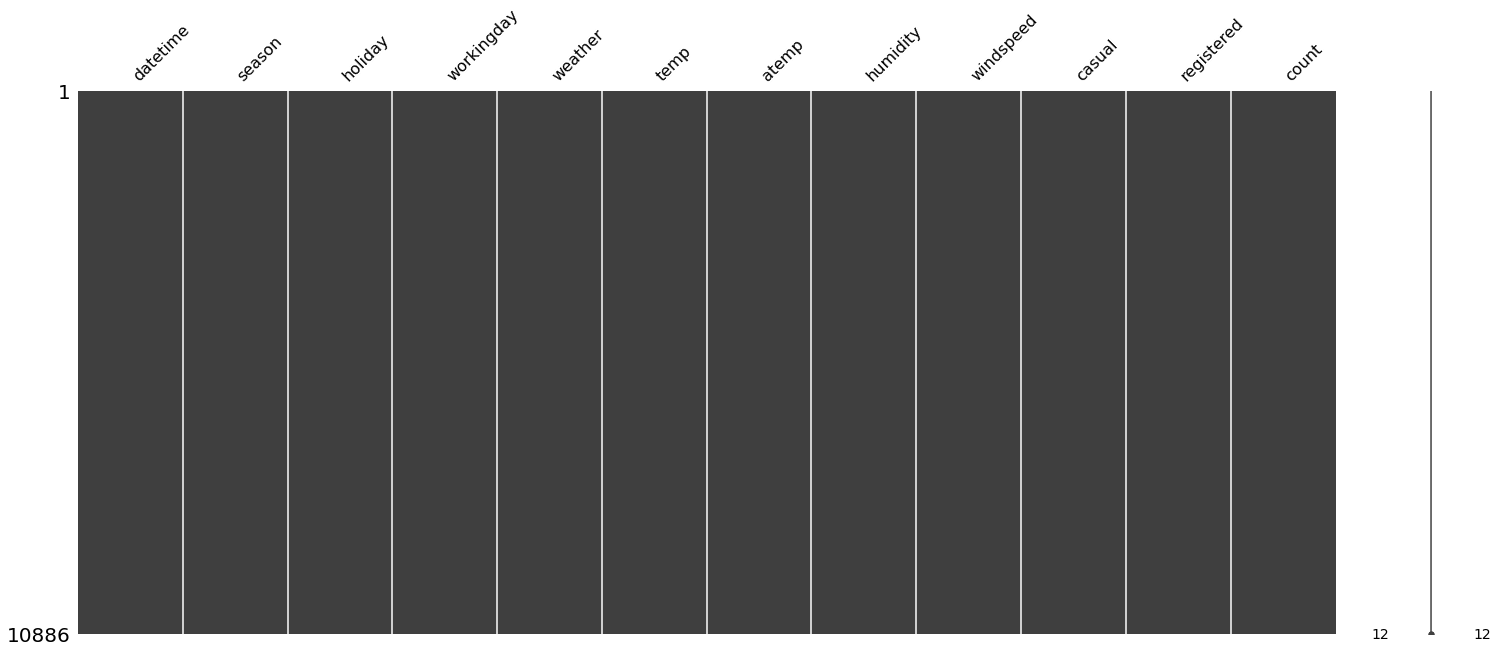

In [95]:
# 可视化缺失值情况
msno.matrix(train_data)

In [96]:
test_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

<AxesSubplot:>

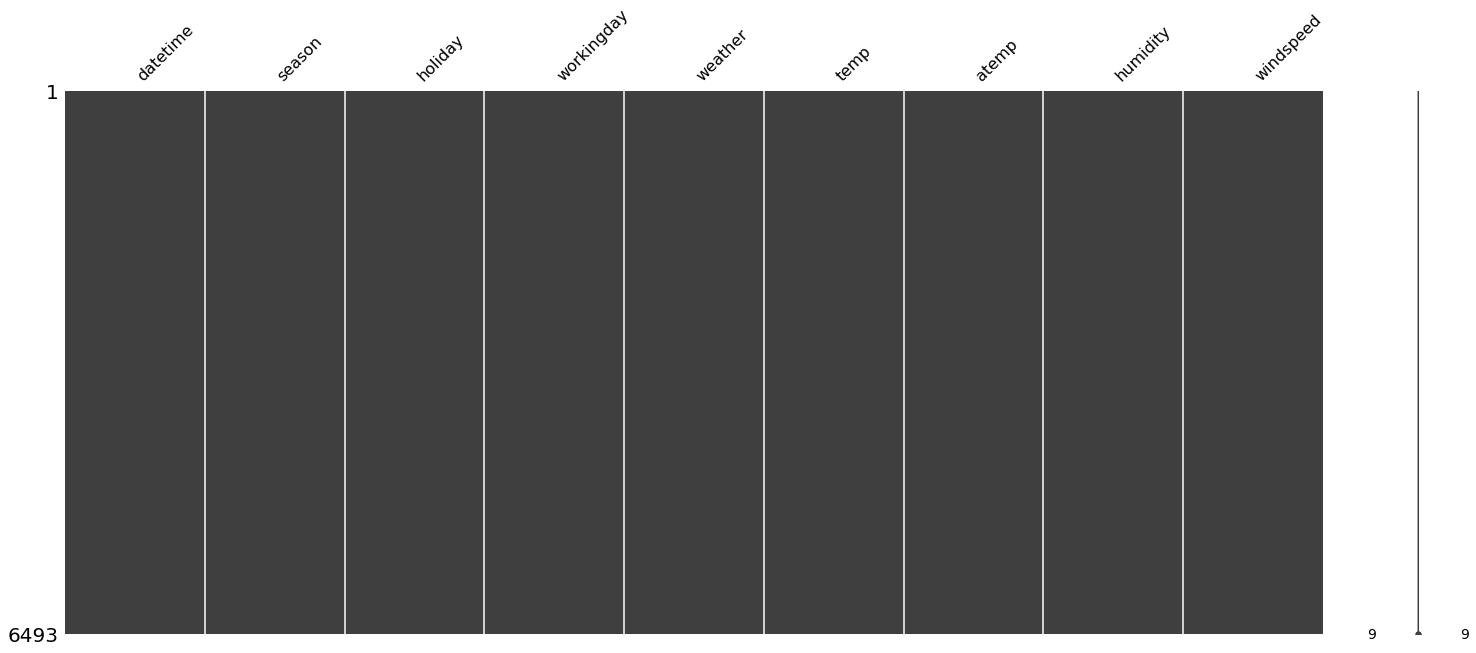

In [97]:
# 可视化缺失值情况
msno.matrix(test_data)

### 查看数据的字段信息

In [98]:
# 查看训练集的字段信息
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [99]:
# 查看测试集的字段信息
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [100]:
# 训练集的行和列
train_data.shape

(10886, 12)

In [101]:
# 测试集的行和列
test_data.shape

(6493, 9)

### 更改时间的格式

In [102]:
train_data['datetime'] = train_data.datetime.apply(pd.to_datetime)

train_data['year'] = train_data.datetime.apply(lambda x:x.year)
train_data['month'] = train_data.datetime.apply(lambda x:x.month)
train_data['day'] = train_data.datetime.apply(lambda x:x.day)
train_data['hour'] = train_data.datetime.apply(lambda x:x.hour)

In [103]:
drop_columns = ['datetime']
train_data.drop(drop_columns,axis=1,inplace=True)
train_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


### 可视化观察数据（类别型数据，数据中四个）

#### 观察天气 （天气分为分为一年四季，统计天数）

In [104]:
# 训练集

In [105]:
train_data.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

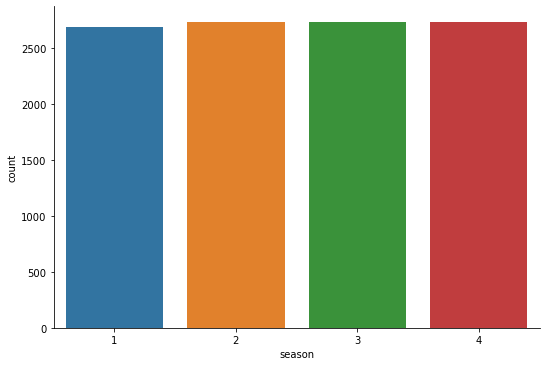

In [106]:
sns.factorplot(x='season',data=train_data,kind='count',size=5,aspect=1.5)

In [107]:
# 测试集

In [108]:
test_data.season.value_counts()

3    1763
2    1676
1    1556
4    1498
Name: season, dtype: int64

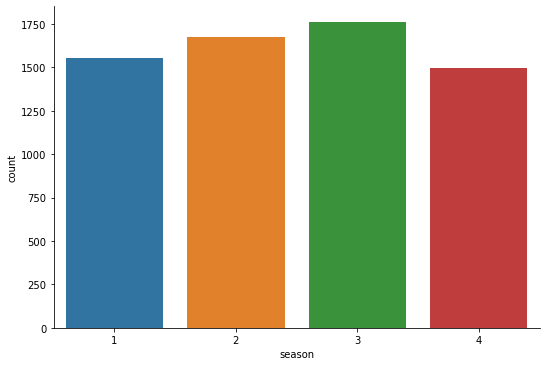

In [109]:
sns.factorplot(x='season',data=test_data,kind='count',size=5,aspect=1.5)

#### 查看节假日与非节假日的情况

In [110]:
# 训练集

In [111]:
train_data.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

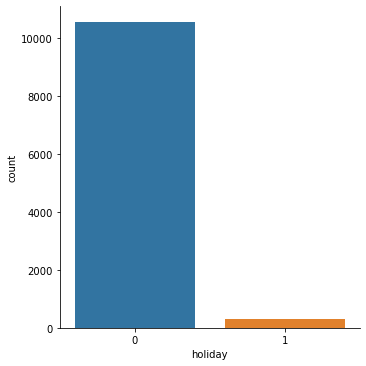

In [112]:
sns.factorplot(x='holiday',data=train_data,kind='count',size=5,aspect=1)

In [113]:
# 测试集

In [114]:
test_data.holiday.value_counts()

0    6304
1     189
Name: holiday, dtype: int64

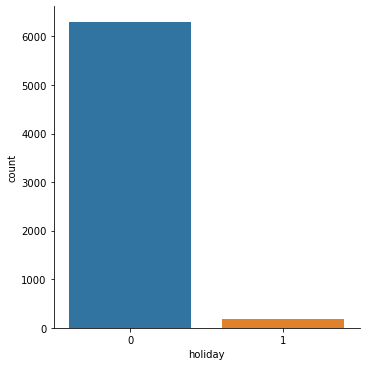

In [115]:
sns.factorplot(x='holiday',data=test_data,kind='count',size=5,aspect=1)

#### 工作日

In [116]:
# 测试集
train_data.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

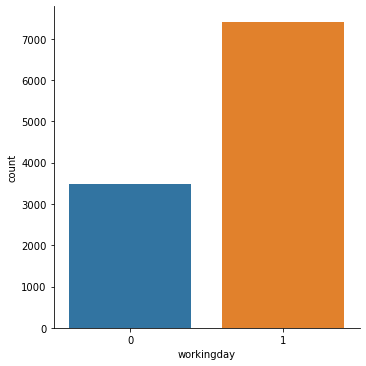

In [117]:
sns.factorplot(x='workingday',data=train_data,kind='count',size=5,aspect=1) 

In [118]:
# 测试集
test_data.workingday.value_counts()

1    4453
0    2040
Name: workingday, dtype: int64

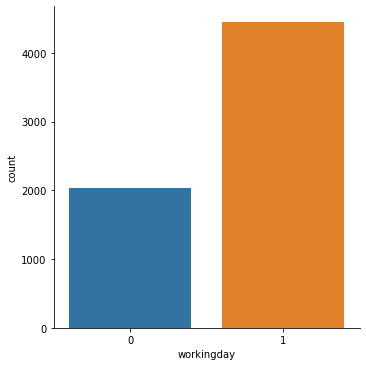

In [119]:
sns.factorplot(x='workingday',data=test_data,kind='count',size=5,aspect=1) 

#### 天气情况

In [120]:
# 训练集

In [121]:
train_data.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

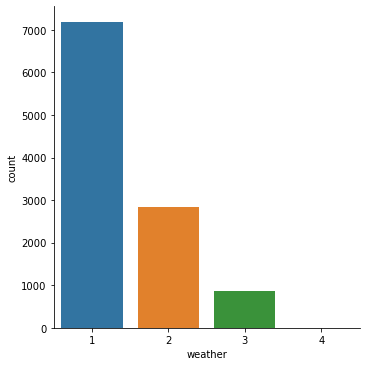

In [122]:
sns.factorplot(x='weather',data=train_data,kind='count',size=5,aspect=1)  

In [123]:
# 测试集

In [124]:
test_data.weather.value_counts()

1    4221
2    1710
3     560
4       2
Name: weather, dtype: int64

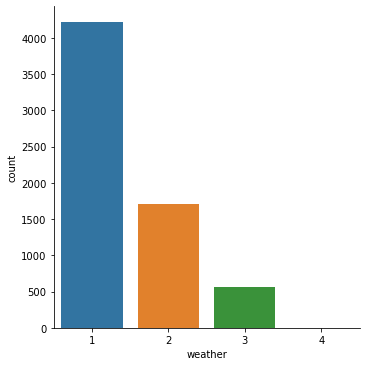

In [125]:
sns.factorplot(x='weather',data=test_data,kind='count',size=5,aspect=1)  

### 可视化数据分布（主要为非类别型数据）

#### 箱型图（主要观察是否有异常值） 

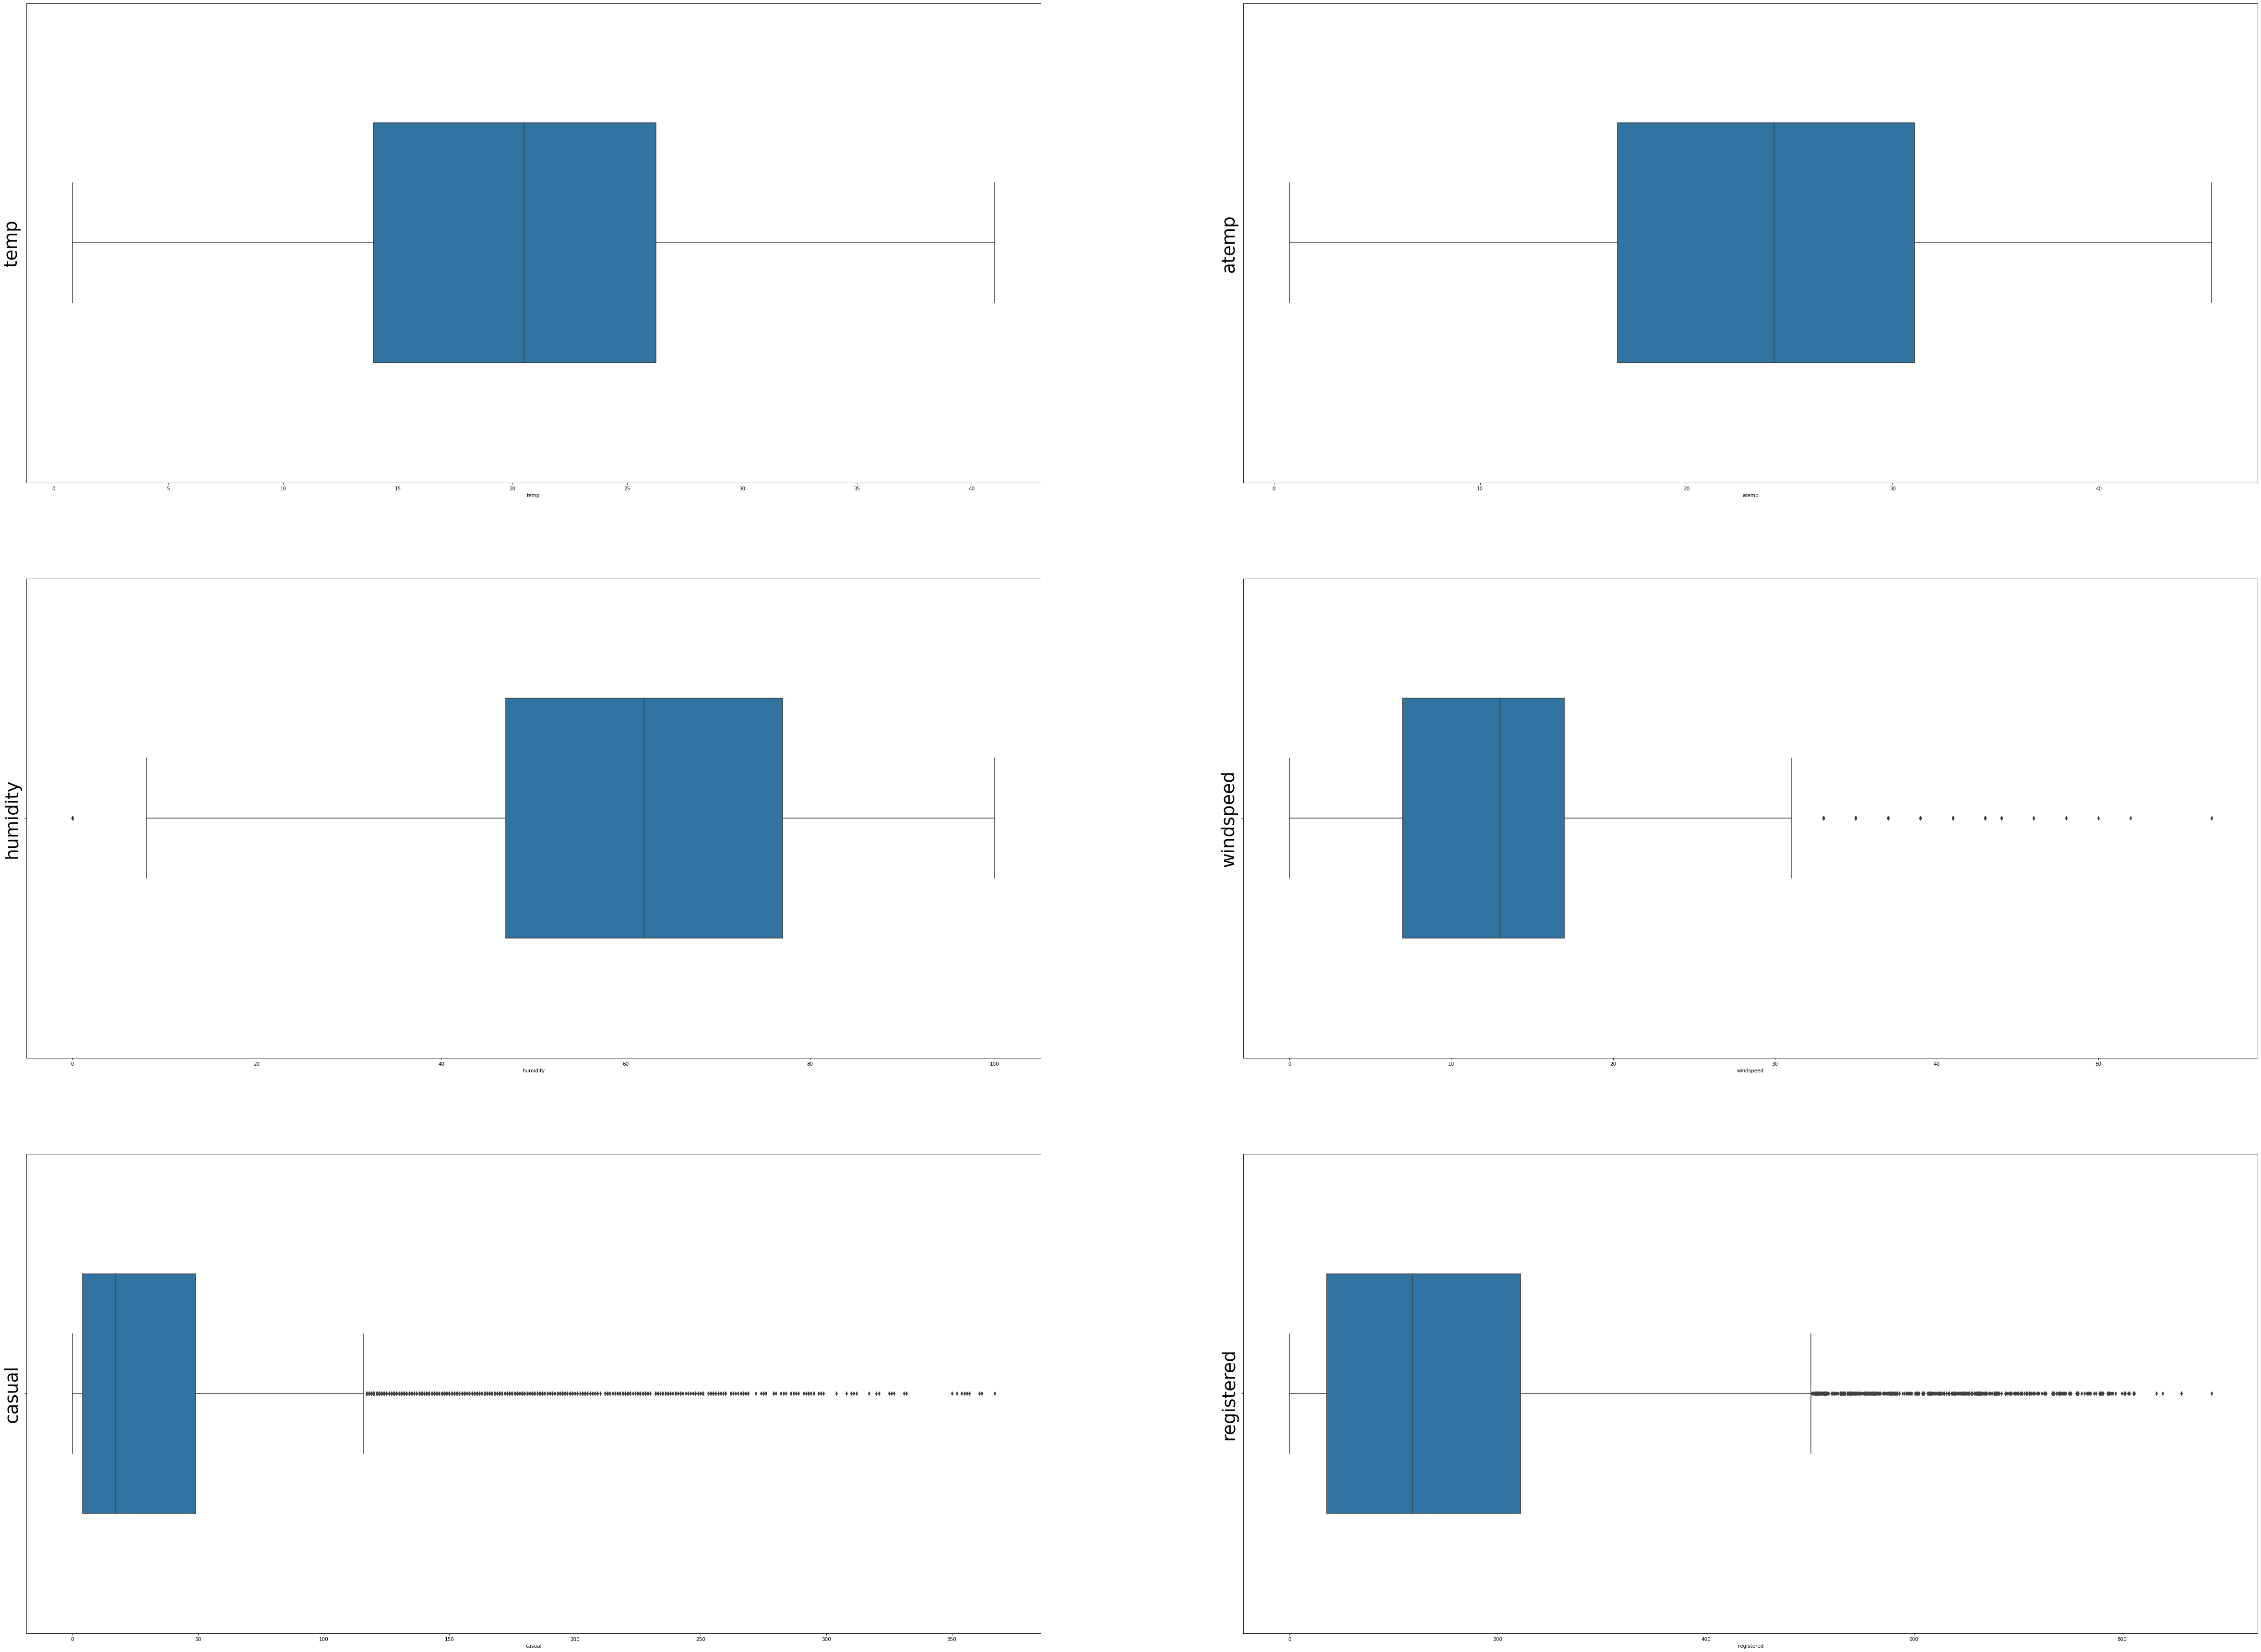

In [126]:
column = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
fig = plt.figure(figsize = (80,60), dpi = 75)
for i in range(6):
    plt.subplot(3,2,i+1)
    sns.boxplot(train_data[column[i]], orient = "v", width = 0.5)
    plt.ylabel(column[i], fontsize = 36)
plt.show()

#### Q-Q图（观察数据是否满足正态分布）

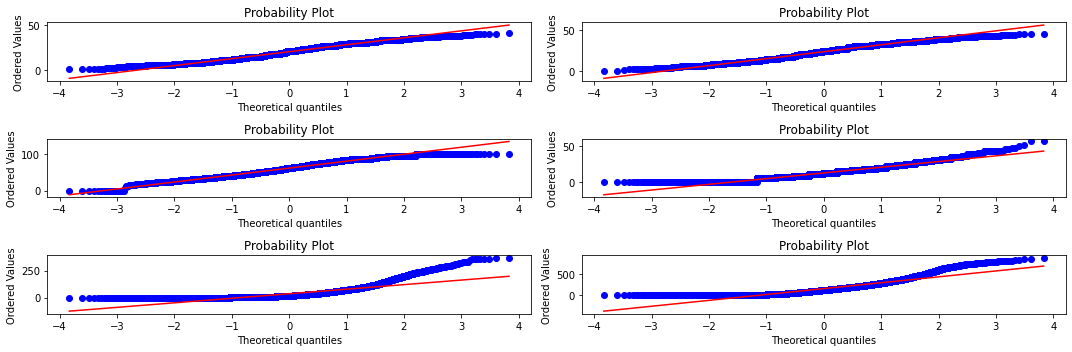

In [127]:
plt.figure(figsize=(15,5))

column = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
for i in range(6):
    ax = plt.subplot(3,2,i+1)
    res =stats.probplot(train_data[column[i]],plot = plt)
plt.tight_layout()
plt.show()

#### KDE图 （观察训练集与数据集中的分布是否一致）

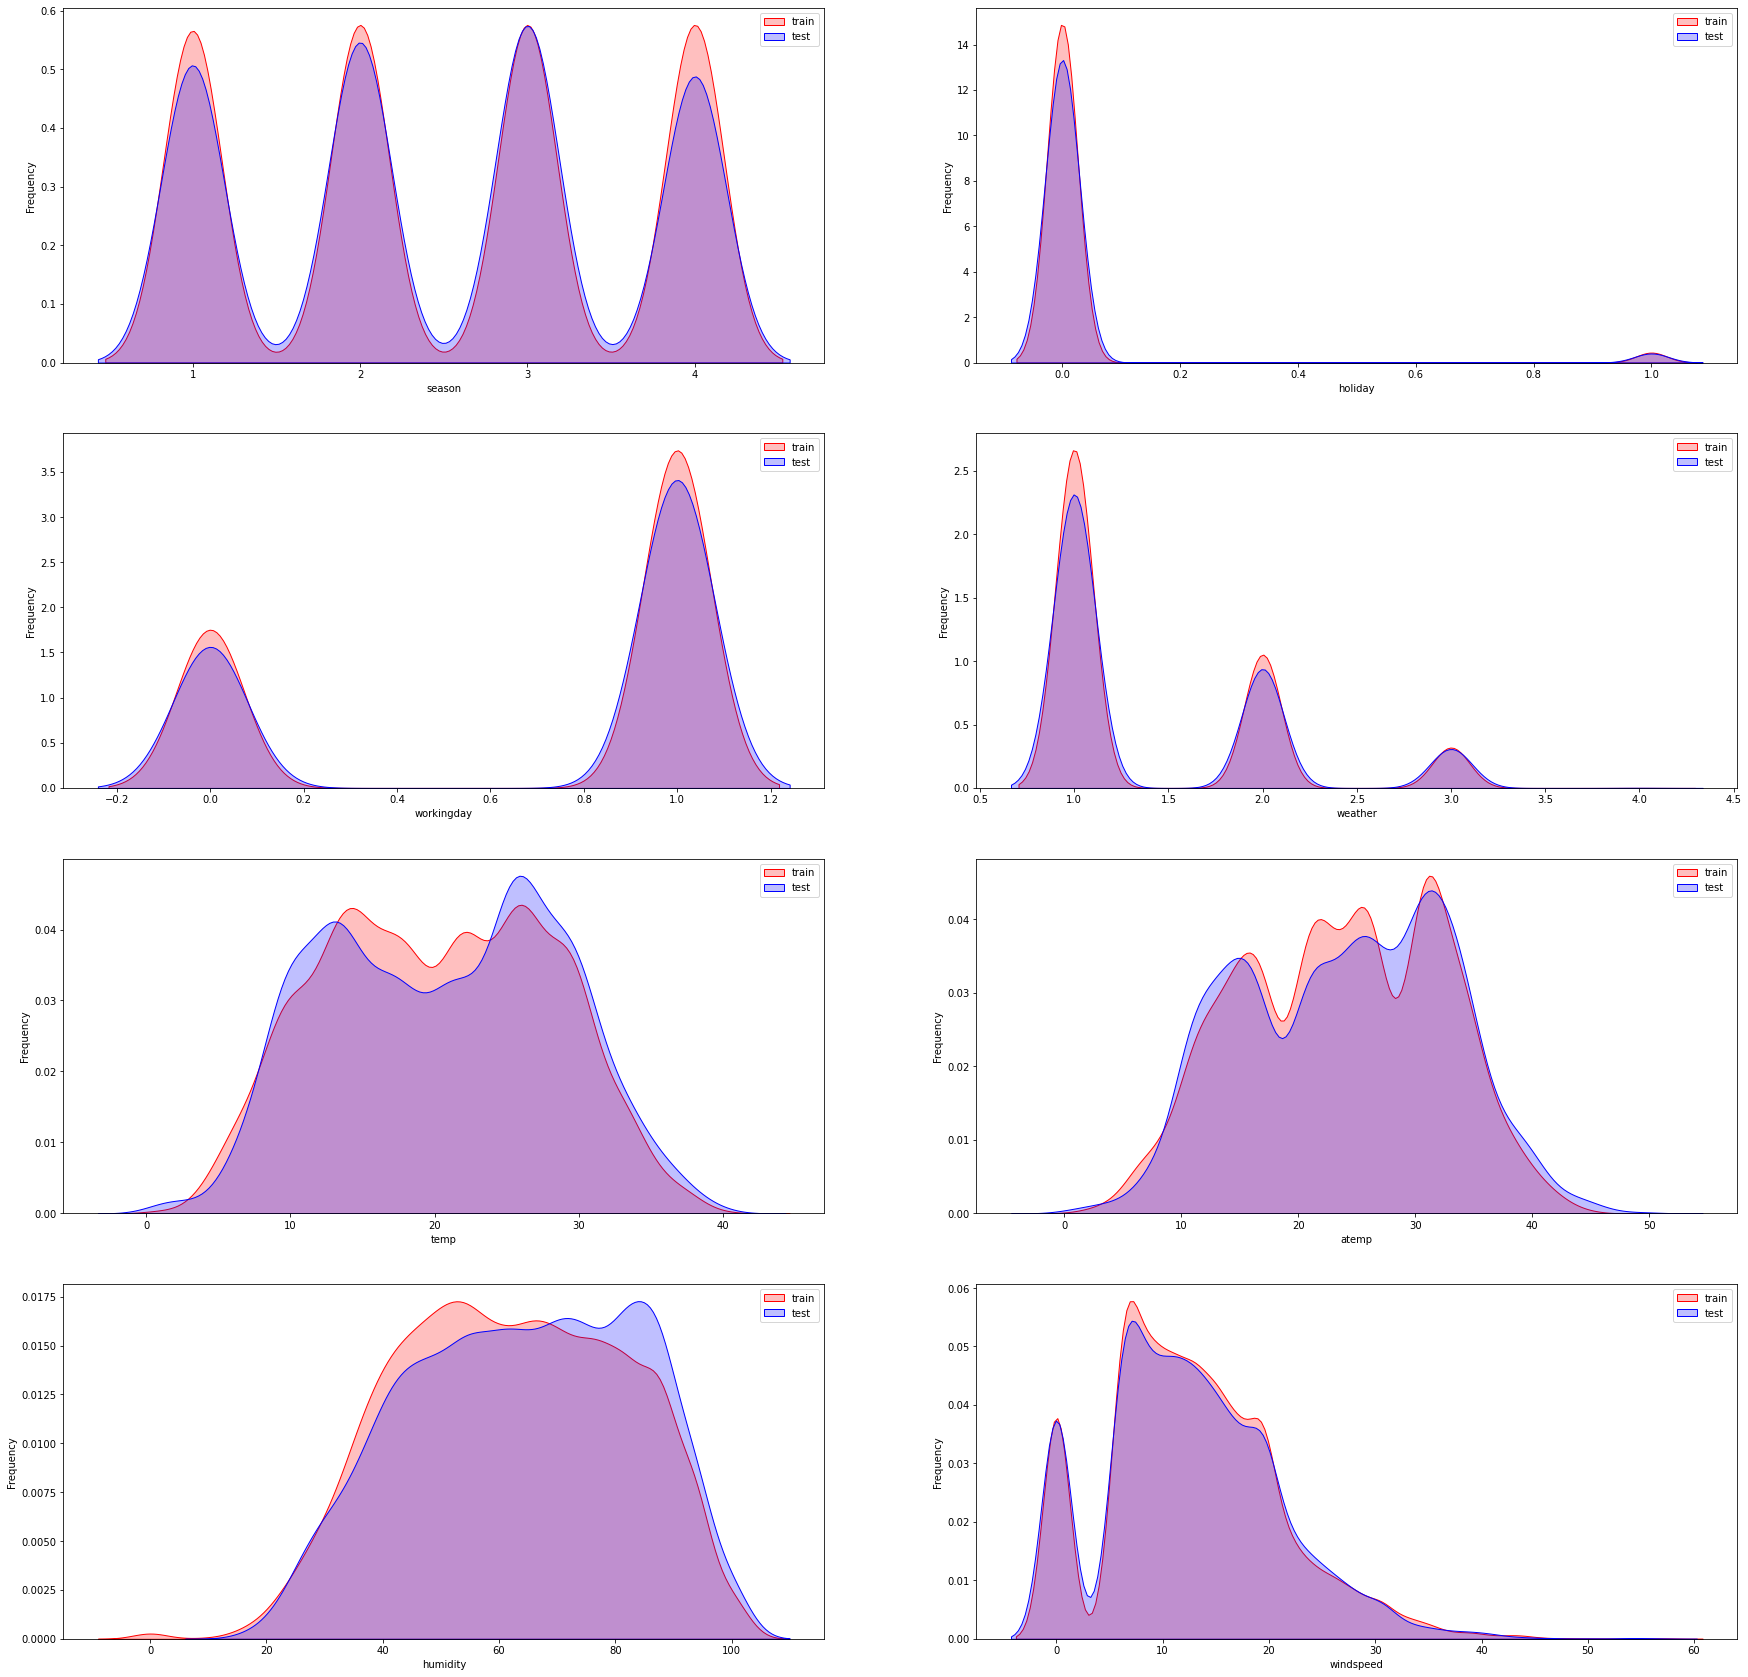

In [128]:
plt.figure(figsize=(30,30))

column = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']

j = 1
for i in range(8):
    ax = plt.subplot(4, 2, j)
    ax = sns.kdeplot(train_data[column[i]], color = 'Red', shade = True)
    ax = sns.kdeplot(test_data[column[i]], color = 'Blue', shade = True)
    ax.set_xlabel(column[i])
    ax.set_ylabel("Frequency")
    ax = ax.legend(['train', 'test'])
    j += 1
    
plt.show()

#### 热力图，查看相关系数

In [129]:
# 选取其中的列，计算相关的系数
train_corr = train_data[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count']].corr()
train_corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


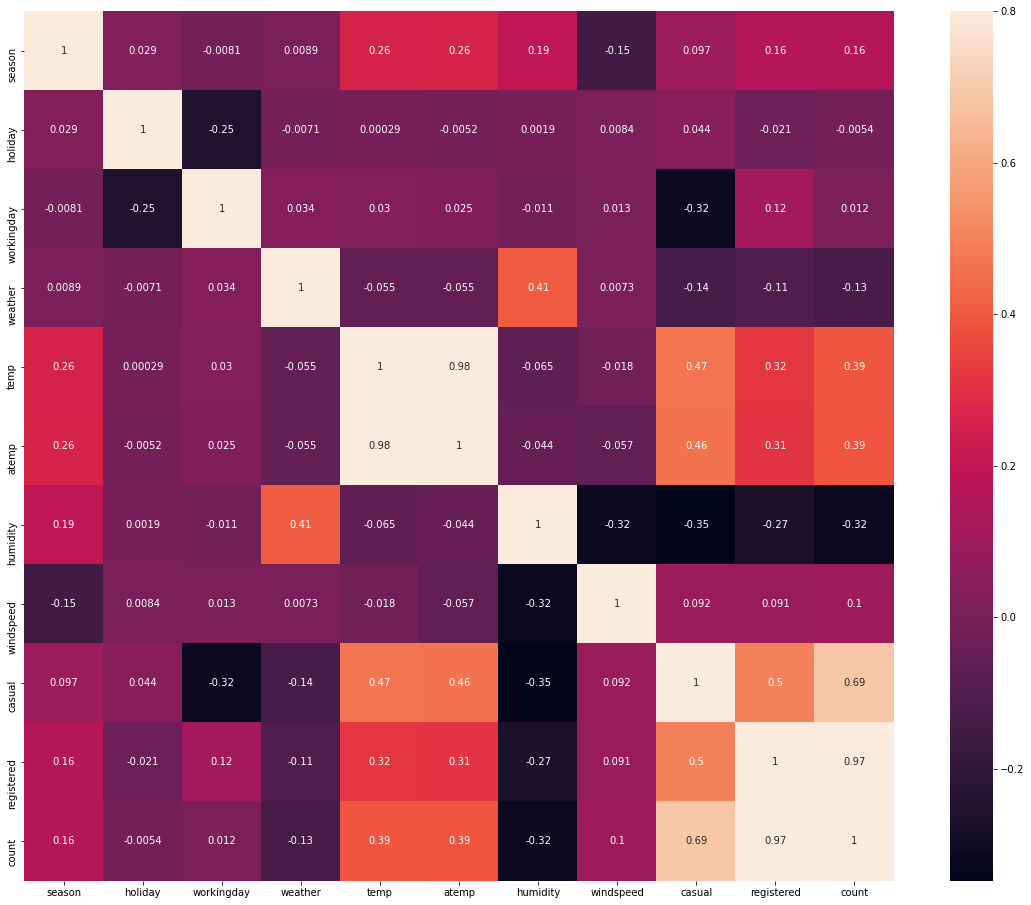

In [130]:
# 调整画布的大小
ax = plt.subplots(figsize = (20,16))
# 画热力图
ax = sns.heatmap(train_corr, vmax = .8, square = True, annot = True)

#### 查看各个特征与数量的关系并采用直方图表示

In [131]:
column = [ 'year','month', 'day', 'hour']

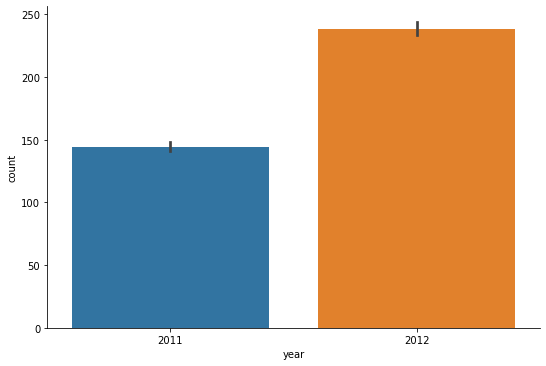

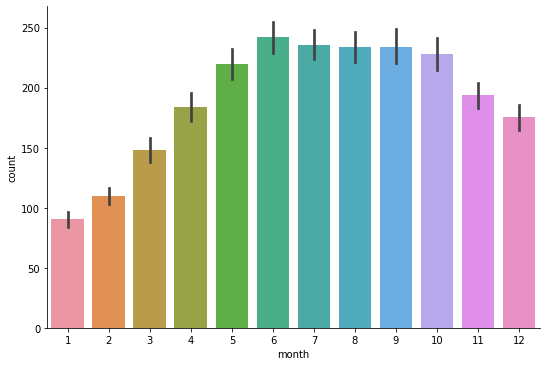

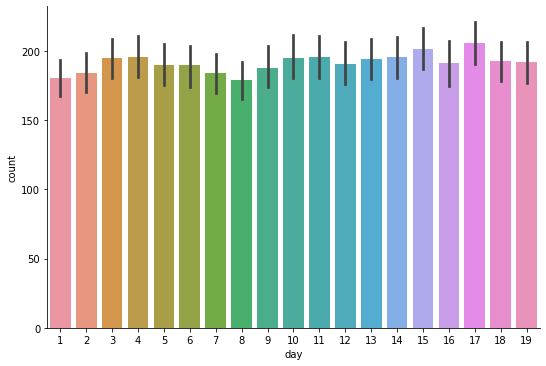

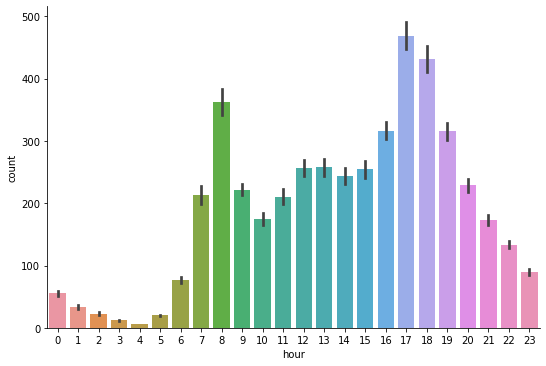

In [132]:
for i in column:
    sns.factorplot(x=i,y="count",data=train_data,kind='bar',size=5,aspect=1.5)